# House Price Prediction using Machine Learning

House price prediction is a problem in the real estate industry to make informed decisions. By using machine learning algorithms we can predict the price of a house based on various features such as location, size, number of bedrooms and other relevant factors. In this project we will explore how to build a machine learning model in Python to predict house prices to gain valuable insights into the housing market.

#### Step 1: Import Libraries and Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("HousePricePrediction.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


#### Step 2: Data Preprocessing

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


#### Step 3: Exploratory Data Analysis


<Axes: >

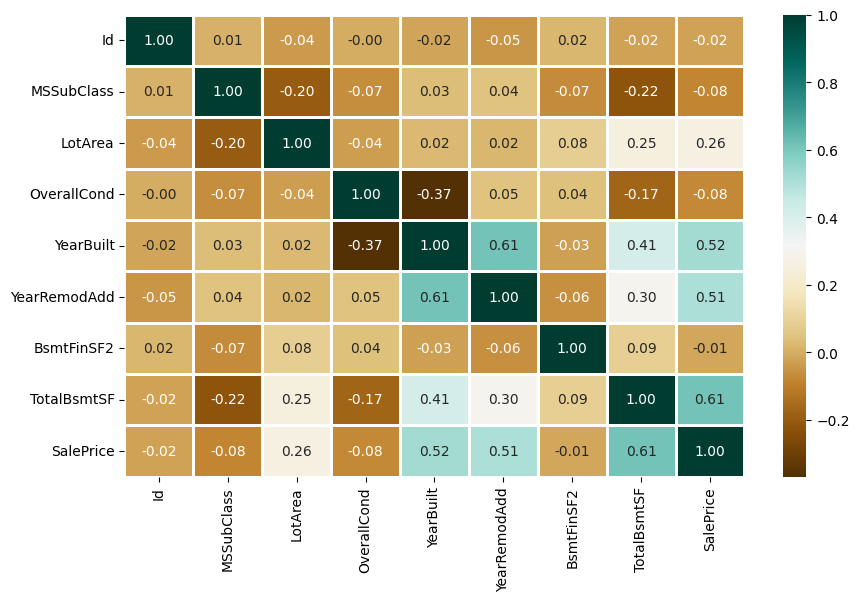

In [9]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numerical_dataset.corr(), 
            cmap = 'BrBG',
            fmt ='.2f',
            linewidths= 2,
            annot = True)

To analyze the different categorical features. Let's draw the barplot.

In [14]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

Categorical variables: 4


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

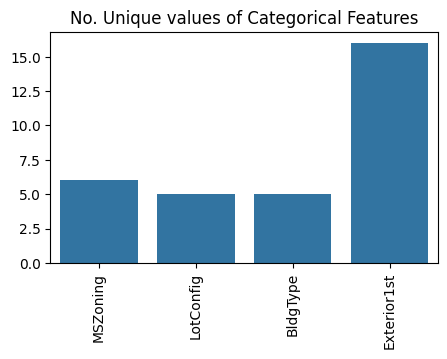

In [18]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(5,3))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

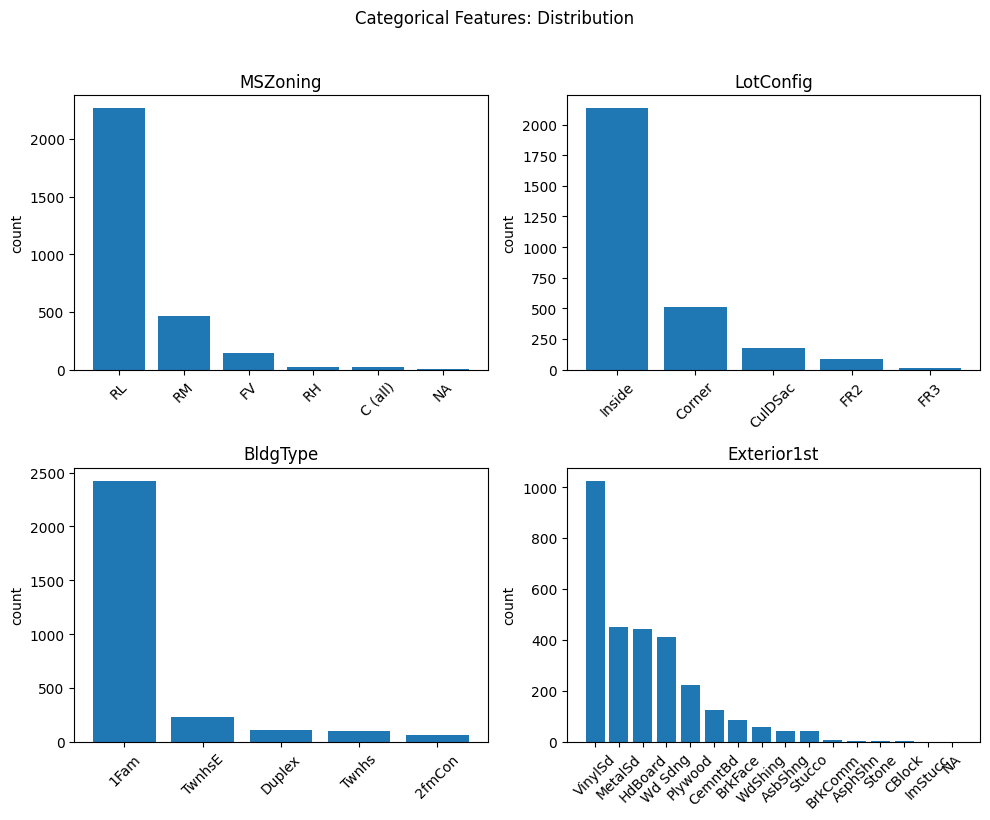

In [28]:
cat_cols = dataset.select_dtypes(include=['object']).columns.tolist()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for ax, col in zip(axes, cat_cols):
    vc = dataset[col].fillna('NA').value_counts()     
    ax.bar(vc.index.astype(str), vc.values)
    ax.set_title(col)
    ax.set_ylabel('count')
    ax.tick_params(axis='x', rotation=45)

for ax in axes[len(cat_cols):]:
    ax.set_visible(False)

fig.suptitle('Categorical Features: Distribution', y=1.02)
plt.tight_layout()
plt.show()

#### Step 4: Data Cleaning

Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data. As in our dataset there are some columns that are not important and irrelevant for the model training. So we can drop that column before training. 

There are 2 approaches to dealing with empty/null values:

1. We can easily delete the column/row (if the feature or record is not much important).
2. Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).

As Id Column will not be participating in any prediction. So we can Drop it.

In [29]:
dataset.drop(['Id'], axis=1, inplace=True)

Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [31]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

Drop records with null values (as the empty records are very less).

In [32]:
new_dataset = dataset.dropna()

Checking features which have null values in the new dataframe (if there are still any).

In [33]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

#### Step 5: OneHotEncoder - For Label categorical features

One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [34]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


#### Step 6: Splitting Dataset into Training and Testing

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X= df_final.drop(['SalePrice'], axis=1)
y = df_final['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

#### Step 7: Model Training and Accuracy

As we have to train the model to determine the continuous values, so we will be using these regression models.

- SVM-Support Vector Machine
- Random Forest Regressor
- Linear Regressor

And to calculate loss we will be using the mean_absolute_percentage_error module

1. SVM - Support vector Machine

  - Support vector Machine is a supervised machine learning algorithm primarily used for classification tasks though it can also be used for regression. It works by finding the hyperplane that best divides a dataset into classes. The goal is to maximize the margin between the data points and the hyperplane

In [36]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, y_train)
y_pred = model_SVR.predict(X_test)

mean_absolute_percentage_error(y_pred, y_test)

0.15945441496865861

2. Random Forest Regression
  - Random Forest is an ensemble learning algorithm used for both classification and regression tasks. It constructs multiple decision trees during training where each tree in the forest is built on a random subset of the data and features, ensuring diversity in the model. The final output is determined by averaging the outputs of individual trees (for regression) or by majority voting (for classification).

In [37]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
y_pred = model_RFR.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)

0.19172624194607016

3. Linear Regression
 - Linear Regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. The goal is to find the line that best fits the data. This is done by minimizing the sum of the squared differences between the observed and predicted values. Linear regression assumes that the relationship between variables is linear.

In [39]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)

0.187416838415999

Conlcusion: clearly SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.16 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.